<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_8/Experiment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Roll Number = 191EE123 <br> 
Name:  Harshavardhan D


In [ ]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
from scipy.signal import chirp, spectrogram
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks



a = 1
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})
!pip install control

import control


     |████████████████████████████████| 339 kB 33.1 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=ec2aa55e1889ae3d4c38923cdc5bd3f159c1dbc831a60270e70ddd4b70896d38
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


# **Problem** **1**. <br>
Part 1: <br>

Transfer function of H1(z)$ for Ro =  0.8 
   z
-------
z - 0.8

Transfer function of H1(z)$ for Ro =  1 
  z
-----
z - 1

Transfer function of H1(z)$ for Ro =  1.2 
   z
-------
z - 1.2

Transfer function of H1(z)$ for Ro =  2 
  z
-----
z - 2



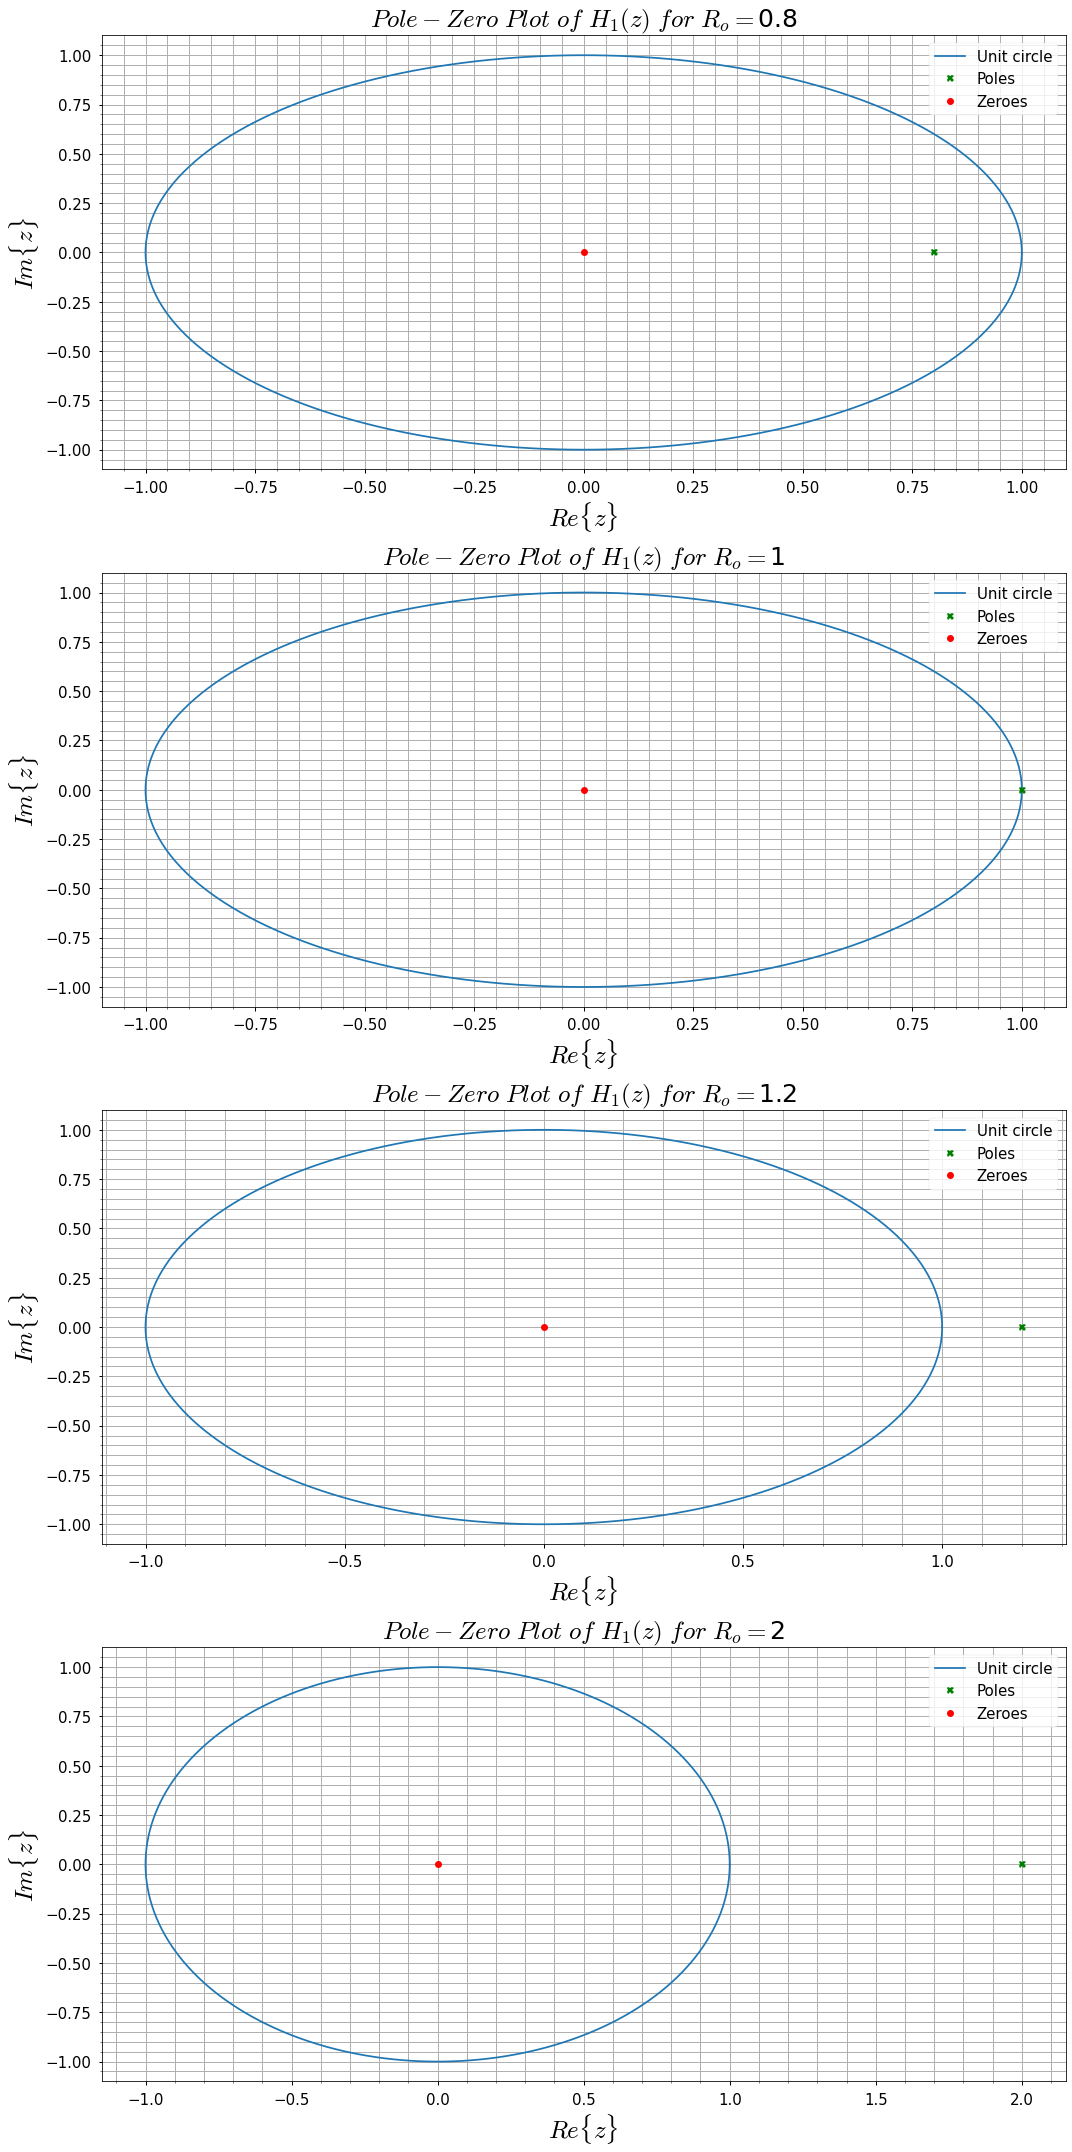

In [ ]:
Ro=[0.8, 1, 1.2, 2]
b=[]
a=[]
fig1, axs = plt.subplots(len(Ro), figsize=(15,30))
def plot_signal(p, z, xaxis_label=None, yaxis_label=None, row=None):
    axs[row].plot(np.cos(theta), np.sin(theta), label='Unit circle')
    axs[row].plot(np.real(p), np.imag(p), 'gX', label='Poles')
    axs[row].plot(np.real(z), np.imag(z), 'ro', label='Zeroes')  
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    axs[row].set_title(r'$Pole-Zero\ Plot\ of\ H_{1}(z)\ for\ R_{o} = $' + str(Ro[i]), fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    axs[row].legend(loc = 'upper right', fontsize = 15)
    fig1.tight_layout()

for i in range(len(Ro)):
    b.append(np.array([1, 0]))
    a.append(np.array([1, -Ro[i]]))
    z, p, k=sp.tf2zpk(b[i], a[i])
    theta=np.arange(0, 2*np.pi, 0.01)
    print(r'Transfer function of H1(z)$ for Ro = ',Ro[i], control.TransferFunction(b[i], a[i], dt=True))
    plot_signal(p, z, xaxis_label=r'$Re\{z\}$', yaxis_label=r'$Im\{z\}$', row=i)


fig1.savefig('fig1.png')

Part 2:

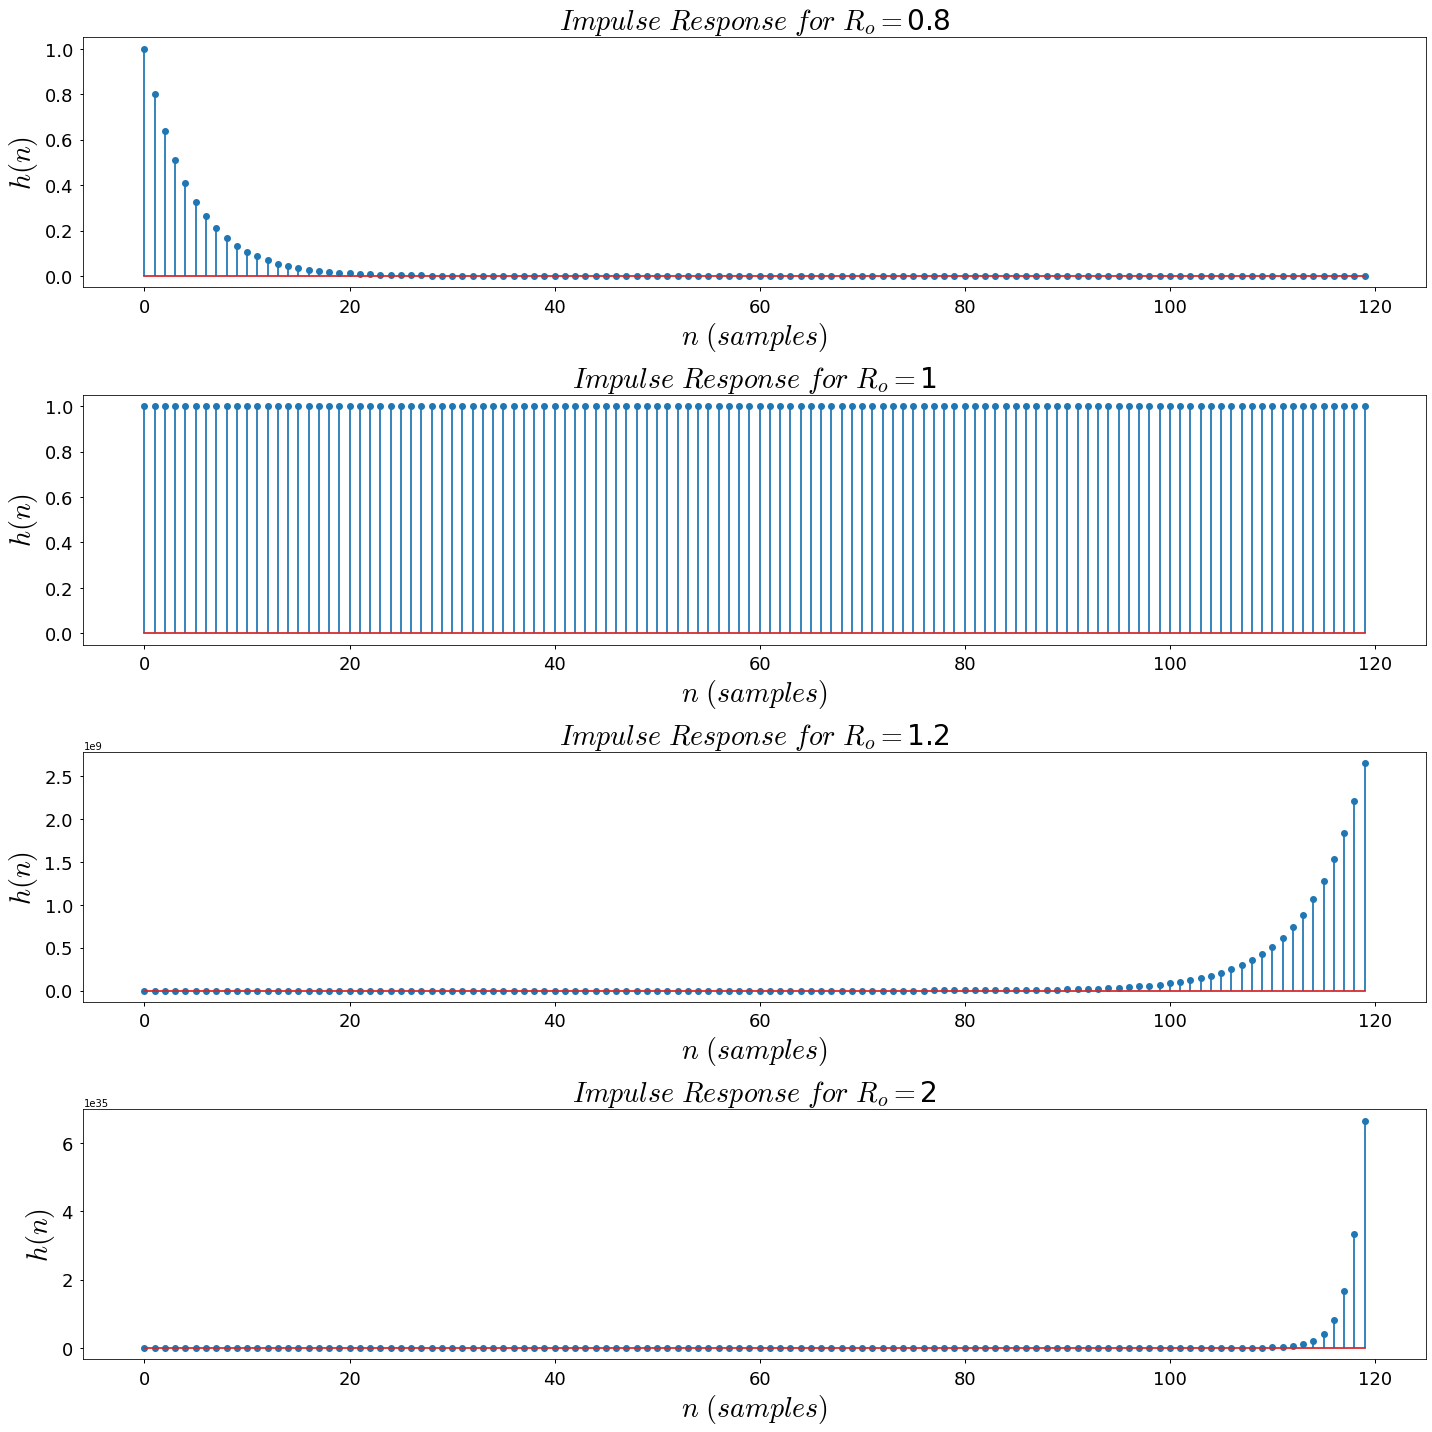

In [ ]:
n=np.arange(120)
x=np.zeros(120)
x[0]=1
y=[]
fig2, axs = plt.subplots(len(Ro), figsize=(20,20))
def plot_s(n, y,xaxis_label=None, yaxis_label=None, title=None, row=None):
    axs[row].stem(n, y, use_line_collection=True)
    axs[row].set_title(title, fontsize = 28)
    axs[row].set_xlabel(xaxis_label, fontsize = 28)
    axs[row].set_ylabel(yaxis_label, fontsize = 28)
    axs[row].tick_params(axis="both", labelsize = 18)
    fig2.tight_layout()  

for i in range(len(Ro)):
    y.append(sp.lfilter(b[i], a[i], x))
    plot_s(n, y[i], title=r'$Impulse\ Response\ for\ R_{o} = $'+str(Ro[i]), xaxis_label=r'$n\ (samples)$', yaxis_label=r'$h(n)$', row=i)
fig2.savefig('fig2.png')

Part 3:

Number of days taken to reach 1 million infections with Ro = 2.5 is:  16


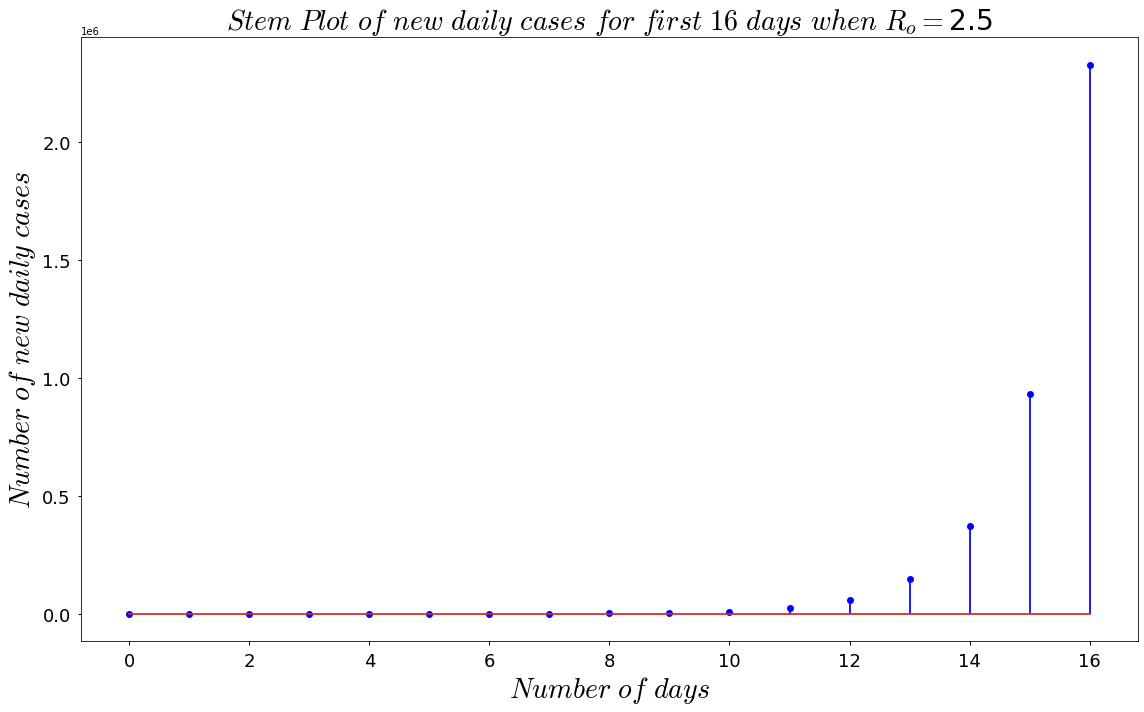

In [ ]:
x=np.zeros(120)
x[0]=1
R=2.5
b=np.array([1, 0])
a=np.array([1, -R])
y=sp.lfilter(b, a, x)
plt.rcParams['figure.figsize'] = [16,10]
def plot_s1(x, y, label=None, title=None, xaxis_label=None, yaxis_label=None, color=None):
 col='b'
 if color:
    col=color
 markerline, stemline, baseline= plt.stem(x, y, use_line_collection=True, label=label)
 plt.setp(stemline, color=col)
 plt.setp(markerline, color=col)
 plt.xlabel(xaxis_label, fontsize = 28)
 plt.ylabel(yaxis_label, fontsize = 28)
 plt.title(title, fontsize = 28)
 plt.xticks(fontsize=18)
 plt.yticks(fontsize=18) 
 plt.tight_layout()


for i in range(len(y)):
    if y[i]>=1e6:
        break
print(r'Number of days taken to reach 1 million infections with Ro = 2.5 is: ', i)
n=np.arange(i+1)
plot_s1(n, y[0:i+1], title=r'$Stem\ Plot\ of\ new\ daily\ cases\ for\ first\ '+str(i)+'\ days\ when\ R_{o} = $' + str(R), xaxis_label=r'$Number\ of\ days$', yaxis_label=r'$Number\ of\ new\ daily\ cases$')
plt.savefig('fig3.png')

Part 4:

                Date    Date_YMD  ...  Daily Deceased  Total Deceased
0    30 January 2020  2020-01-30  ...               0               0
1    31 January 2020  2020-01-31  ...               0               0
2    1 February 2020  2020-02-01  ...               0               0
3    2 February 2020  2020-02-02  ...               0               0
4    3 February 2020  2020-02-03  ...               0               0
..               ...         ...  ...             ...             ...
636  27 October 2021  2021-10-27  ...             734          455828
637  28 October 2021  2021-10-28  ...             805          456633
638  29 October 2021  2021-10-29  ...             551          457184
639  30 October 2021  2021-10-30  ...             445          457629
640  31 October 2021  2021-10-31  ...             251          457880

[641 rows x 8 columns]


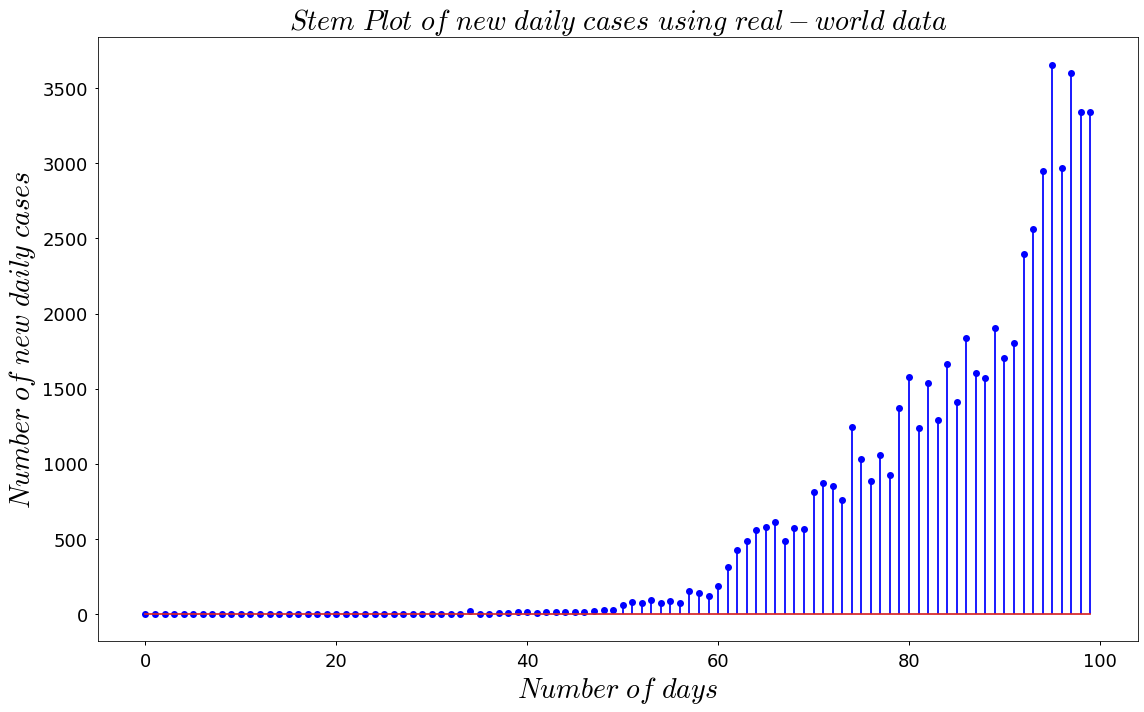

In [ ]:
data = pd.read_csv('case_time_series.csv')
print(data)
#print ("Size of data:",data.shape)
cases = data['Daily Confirmed']
d = np.arange(0,641)
figx, axs = plt.subplots(figsize=(16,10))
def plot_signal(x, y, label=None, title=None, xaxis_label=None, yaxis_label=None, color=None):
 col='b'
 if color:
    col=color
 markerline, stemline, baseline= plt.stem(x[:100], y[:100], use_line_collection=True, label=label)
 plt.setp(stemline, color=col)
 plt.setp(markerline, color=col)
 plt.xlabel(xaxis_label, fontsize = 28)
 plt.ylabel(yaxis_label, fontsize = 28)
 plt.title(title, fontsize = 28)
 plt.xticks(fontsize=18)
 #plt.xlim(0,100)
 plt.yticks(fontsize=18) 
 plt.tight_layout()
    
plot_signal(d, cases, title=r'$Stem\ Plot\ of\ new\ daily\ cases\ using\ real-world\ data$', xaxis_label=r'$Number\ of\ days$', yaxis_label=r'$Number\ of\ new\ daily\ cases$')
figx.savefig('fig1.png')

In [33]:

date = [156, 167, 196, 205, 218, 222]
p = np.zeros(len(date))
for i in range(len(date)):
  p[i] = cases[date[i]]**(1/date[i]) 

for i in range (len(date)):
  print("Basic Reproduction number at day {}: {}".format(date[i], p[i]))

P = np.average(p)
print(P)

Basic Reproduction number at day 156: 1.066793508606086
Basic Reproduction number at day 167: 1.064206270241216
Basic Reproduction number at day 196: 1.0580987533113426
Basic Reproduction number at day 205: 1.0559337018830506
Basic Reproduction number at day 218: 1.0535641317575495
Basic Reproduction number at day 222: 1.052720919793647
1.0585528809321485


Part 5:

The transfer function of integrator filter is 
  z
-----
z - 1

The total number of infections after 20 days =  60632979


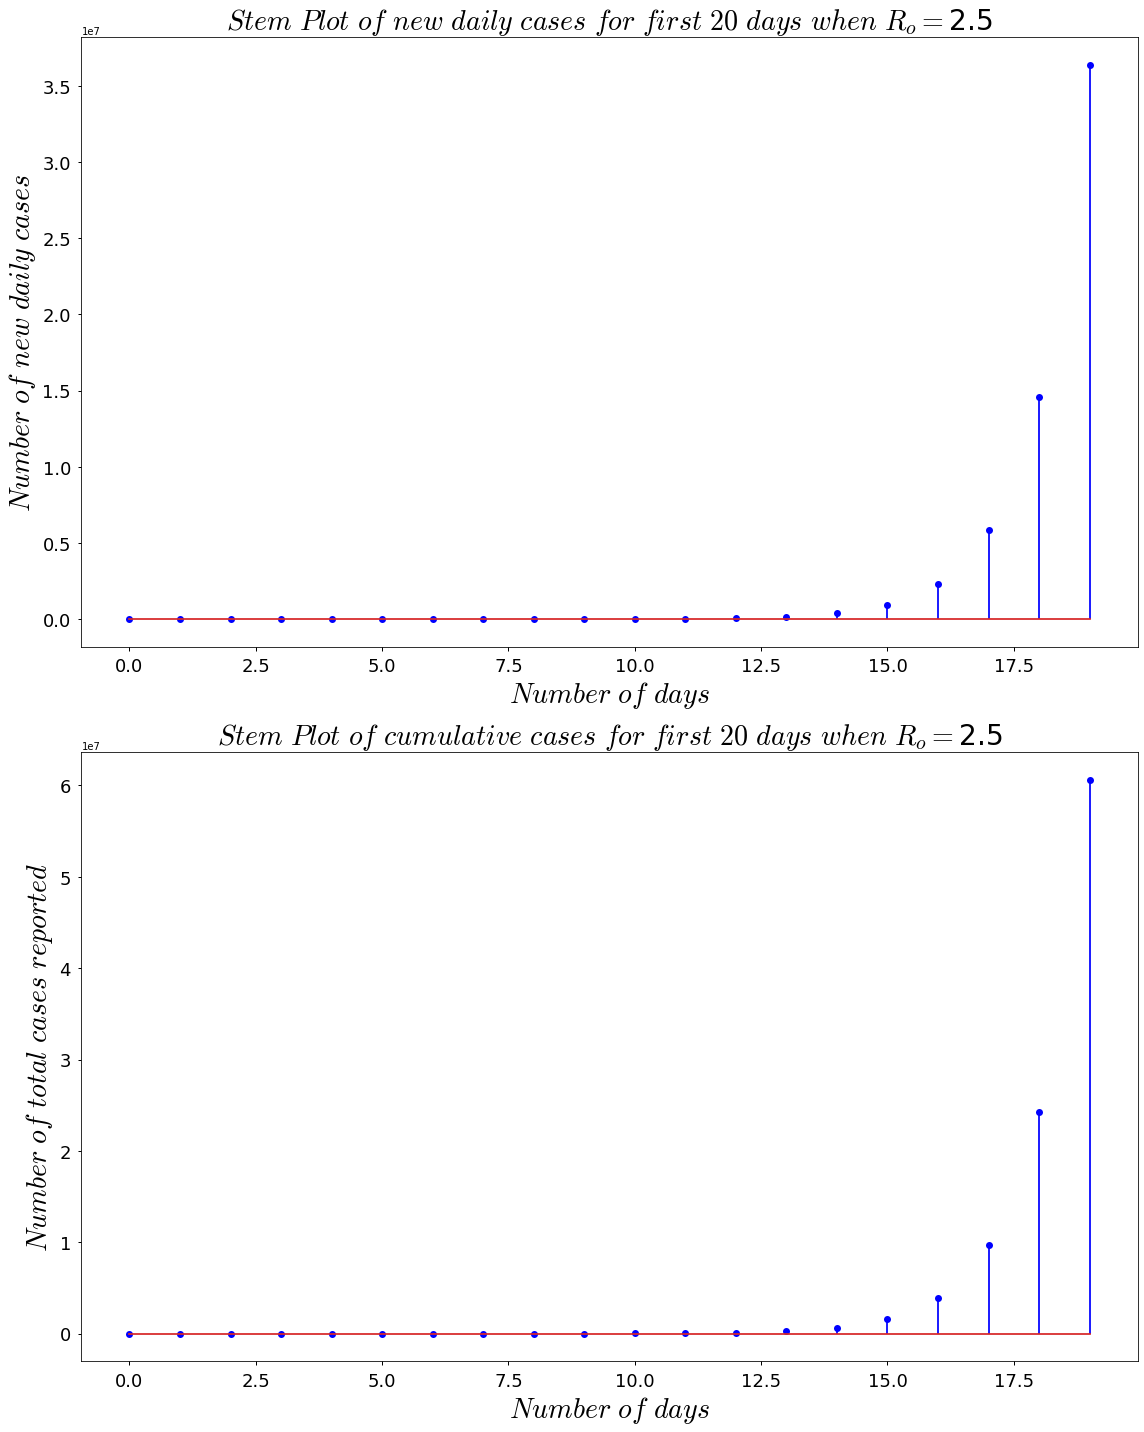

In [ ]:
def plot_s2(x, y, label=None, title=None, xaxis_label=None, yaxis_label=None,  color=None):
 col='b'
 if color:
    col=color
 markerline, stemline, baseline= plt.stem(x, y, use_line_collection=True, label=label)
 plt.setp(stemline, color=col)
 plt.setp(markerline, color=col)
 plt.xlabel(xaxis_label, fontsize = 28)
 plt.ylabel(yaxis_label, fontsize = 28)
 plt.title(title, fontsize = 28)
 plt.xticks(fontsize=18)
 plt.yticks(fontsize=18) 
 plt.tight_layout()

bi=np.array([1, 0])
ai=np.array([1, -1])
print(r'The transfer function of integrator filter is', control.TransferFunction(bi, ai, dt=True))
x1=np.zeros(20)
x1[0]=1
n=np.arange(20)
plt.rcParams['figure.figsize'] = [16, 20]
r=2.5
b=np.array([1, 0])
a=np.array([1, -r])
y1=sp.lfilter(b, a, x1)
plt.subplot(211)
plot_s2(n, y1, title=r'$Stem\ Plot\ of\ new\ daily\ cases\ for\ first\ 20\ days\ when\ R_{o} = $' + str(r), xaxis_label=r'$Number\ of\ days$', yaxis_label=r'$Number\ of\ new\ daily\ cases$')
plt.subplot(212)
yc=sp.lfilter(bi, ai, y1)
plot_s2(n, yc, title=r'$Stem\ Plot\ of\ cumulative\ cases\ for\ first\ 20\ days\ when\ R_{o} = $' + str(r), xaxis_label=r'$Number\ of\ days$', yaxis_label=r'$Number\ of\ total\ cases\ reported$')
print('The total number of infections after 20 days = ', int(yc[-1])) #Rounded to the nearest integer
plt.savefig('fig5.png')

# **Problem** **2**. <br>
Part 1: <br>

The transfer function Hm(z):  
                                                             z^12
-------------------------------------------------------------------------------------------------------------------------------
z^12 - 0.1 z^11 - 0.15 z^10 - 0.25 z^9 - 0.26 z^8 - 0.34 z^7 - 0.42 z^6 - 0.25 z^5 - 0.2 z^4 - 0.15 z^3 - 0.1 z^2 - 0.1 z - 0.1

The number of days taken to reach 1 million new daily infections with Ro = 2.5:  94


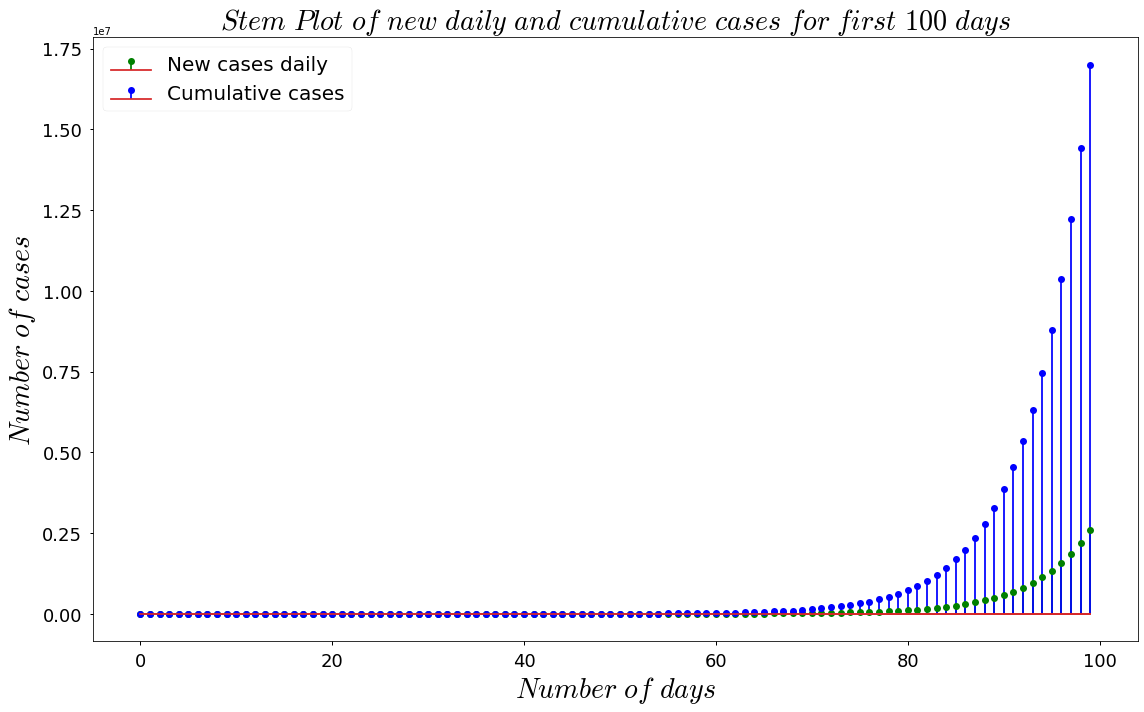

In [ ]:
def plot_s3(x, y, label=None, title=None, xaxis_label=None, yaxis_label=None, color=None):
 col='b'
 if color:
    col=color
 markerline, stemline, baseline= plt.stem(x, y, use_line_collection=True, label=label)
 plt.setp(stemline, color=col)
 plt.setp(markerline, color=col)
 plt.xlabel(xaxis_label, fontsize = 28)
 plt.ylabel(yaxis_label, fontsize = 28)
 plt.title(title, fontsize = 28)
 plt.xticks(fontsize=18)
 plt.yticks(fontsize=18) 
 plt.tight_layout()
M=12
cf=np.array([.1, .15, .25, .26, .34, .42, .25, .2, .15, .1, .1, .1])
bm=np.zeros(13)
bm[0]=1
am=np.hstack((np.array([1]), -1*cf))
print(r'The transfer function Hm(z): ', control.TransferFunction(bm, am, dt=True))
n=np.arange(100)
x=np.zeros(100)
x[0]=1
y2=sp.lfilter(bm, am, x)
plt.rcParams['figure.figsize'] = [16, 10]
plot_s3(n, y2, label='New cases daily', xaxis_label=r'$Number\ of\ days$', yaxis_label=r'$Number\ of\ cases$', color='g')
yc1=sp.lfilter(bi, ai, y2)
plot_s3(n, yc1, label='Cumulative cases', title=r'$Stem\ Plot\ of\ new\ daily\ and\ cumulative\ cases\ for\ first\ 100\ days$', xaxis_label=r'$Number\ of\ days$', yaxis_label=r'$Number\ of\ cases$')
plt.legend(loc='upper left', prop={"size":20})

for i in range(len(y)):
    if y2[i]>=1e6:
        break
print(r'The number of days taken to reach 1 million new daily infections with Ro = 2.5: ', i)
plt.savefig('fig6.png')

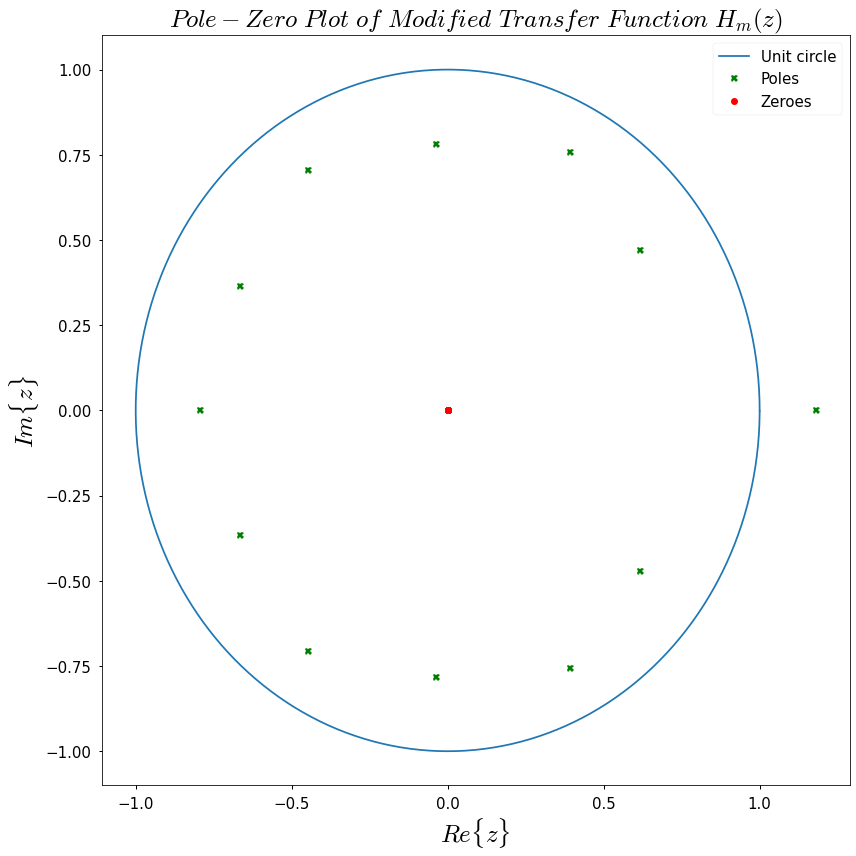

In [ ]:
zeroes, poles, gain =sp.tf2zpk(bm, am)
theta=np.arange(0, 2*np.pi, 0.01)
fig, axs = plt.subplots(figsize=(12,12))
def plot(p, z, xaxis_label=None, yaxis_label=None, row=None):  
    axs.plot(np.cos(theta), np.sin(theta), label='Unit circle')
    axs.plot(np.real(p), np.imag(p), 'gX', label='Poles')
    axs.plot(np.real(z), np.imag(z), 'ro', label='Zeroes')
    axs.legend(loc = 'upper right', fontsize = 15)
    axs.set_title(r'$Pole-Zero\ Plot\ of\ Modified\ Transfer\ Function\ H_m(z)$', fontsize = 25)
    axs.set_xlabel(xaxis_label, fontsize = 25)
    axs.set_ylabel(yaxis_label, fontsize = 25)
    axs.tick_params(axis="both", labelsize = 15)
    fig.tight_layout()
    
plot(poles, zeroes, xaxis_label=r'$Re\{z\}$', yaxis_label=r'$Im\{z\}$', row=0)
fig.savefig('Q2_pz.png')

# **Problem** **3**. <br>
Part 2: <br>

The transfer function Hm(z, p) when (rho) value is 0.25 is given by : 
                                                                       z^12
---------------------------------------------------------------------------------------------------------------------------------------------------
z^12 - 0.075 z^11 - 0.1125 z^10 - 0.1875 z^9 - 0.195 z^8 - 0.255 z^7 - 0.315 z^6 - 0.1875 z^5 - 0.15 z^4 - 0.1125 z^3 - 0.075 z^2 - 0.075 z - 0.075

The cumulative Number of infections after 100 days for (rho) value = 0.25 is 77744.79764772893 
The transfer function Hm(z, p) when (rho) value is 0.5 is given by : 
                                                                 z^12
---------------------------------------------------------------------------------------------------------------------------------------
z^12 - 0.05 z^11 - 0.075 z^10 - 0.125 z^9 - 0.13 z^8 - 0.17 z^7 - 0.21 z^6 - 0.125 z^5 - 0.1 z^4 - 0.075 z^3 - 0.05 z^2 - 0.05 z - 0.05

The cumulative Number of infections after 100 d

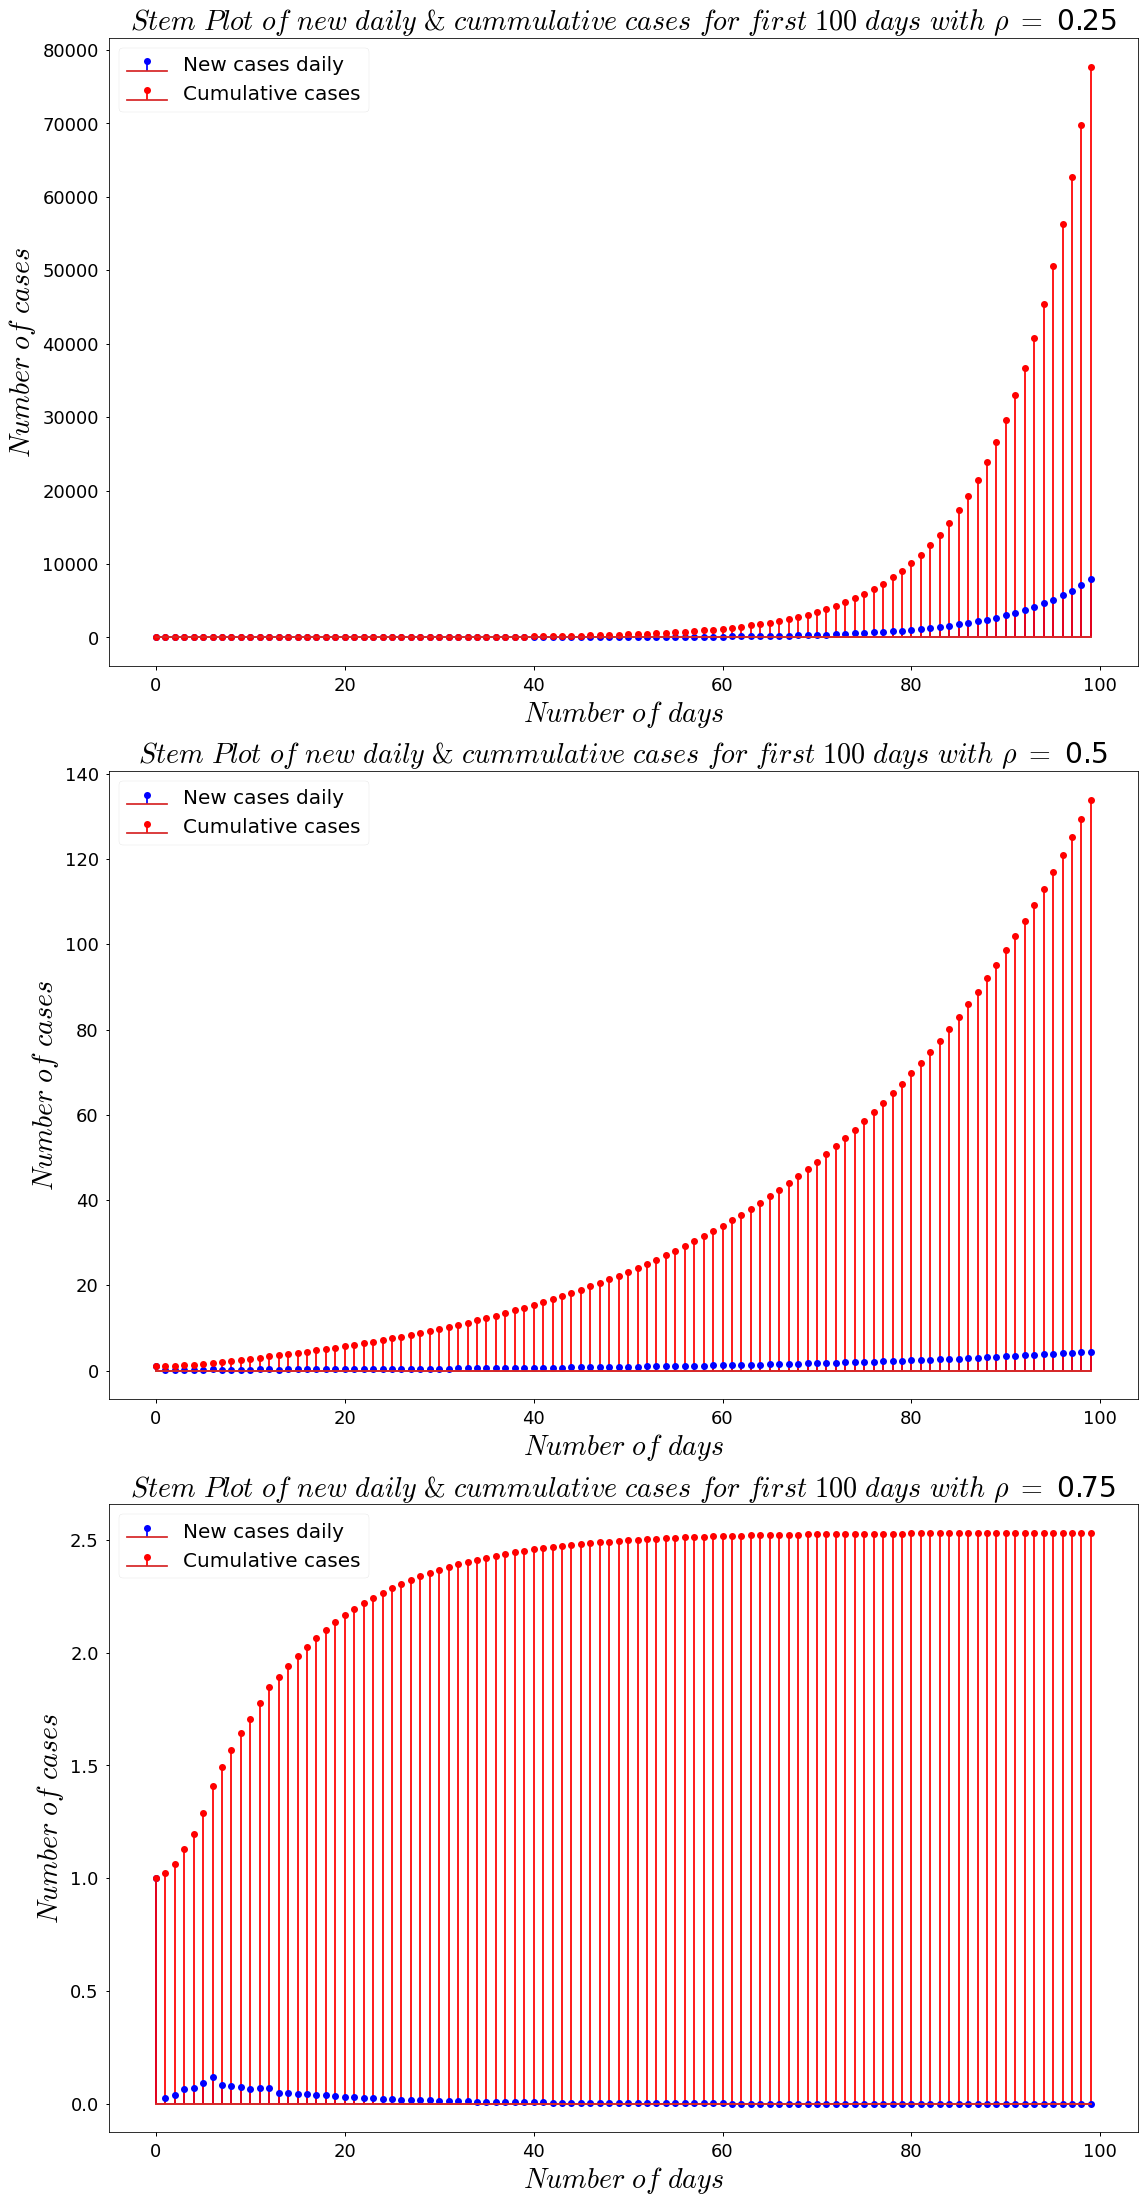

In [ ]:
def plot_s4(x, y, label=None, title=None, xaxis_label=None, yaxis_label=None,  color=None):
 col='b'
 if color:
    col=color
 markerline, stemline, baseline= plt.stem(x, y, use_line_collection=True, label=label)
 plt.setp(stemline, color=col)
 plt.setp(markerline, color=col)
 plt.xlabel(xaxis_label, fontsize = 28)
 plt.ylabel(yaxis_label, fontsize = 28)
 plt.title(title, fontsize = 28)
 plt.xticks(fontsize=18)
 plt.yticks(fontsize=18) 
 plt.tight_layout()
M=12
rho=[0.25, 0.5, 0.75]
cf=np.array([.1, .15, .25, .26, .34, .42, .25, .2, .15, .1, .1, .1])
bmp=[]
amp=[]
plt.rcParams['figure.figsize'] = [16, 40]
n=np.arange(100)
x=np.zeros(100)
x[0]=1
y3=[]
yc2=[]
for i in range(len(rho)):
        bm=np.zeros(13)
        bm[0]=1
        bmp.append(bm)
        amp.append(np.hstack((np.array([1]), -1*(1-rho[i])*cf)))
        print(r'The transfer function Hm(z, p) when (rho) value is {} is given by : {}'.format(rho[i], control.TransferFunction(bmp[i], amp[i], dt=True)))
        y3.append(sp.lfilter(bmp[i], amp[i], x))
        plt.subplot(410+i+1)
        plot_s4(n, y3[i],label='New cases daily', title=r'$Stem\ Plot\ of\ new\ daily\ &\ cummulative\ cases\ for\ first\ 100\ days\ with\ \rho\ = $ '+str(rho[i]), xaxis_label=r'$Number\ of\ days$', yaxis_label=r'$Number\ of\ cases$')
        yc2.append(sp.lfilter(bi, ai, y3[i]))
        plot_s4(n, yc2[i], label='Cumulative cases', title=r'$Stem\ Plot\ of\ new\ daily\ &\ cummulative\ cases\ for\ first\ 100\ days\ with\ \rho\ = $ '+str(rho[i]), xaxis_label=r'$Number\ of\ days$', yaxis_label=r'$Number\ of\ cases$', color='r')
        print(r'The cumulative Number of infections after 100 days for (rho) value = {} is {} '.format(rho[i], yc2[i][-1]))
        plt.legend(loc='upper left', prop={"size":20})



plt.savefig('fig7.png')

# **Problem** **4**. <br>
Part 1: <br>

The first order Transfer function for Ro = 1.15 is given by 
   z
--------
z - 1.15



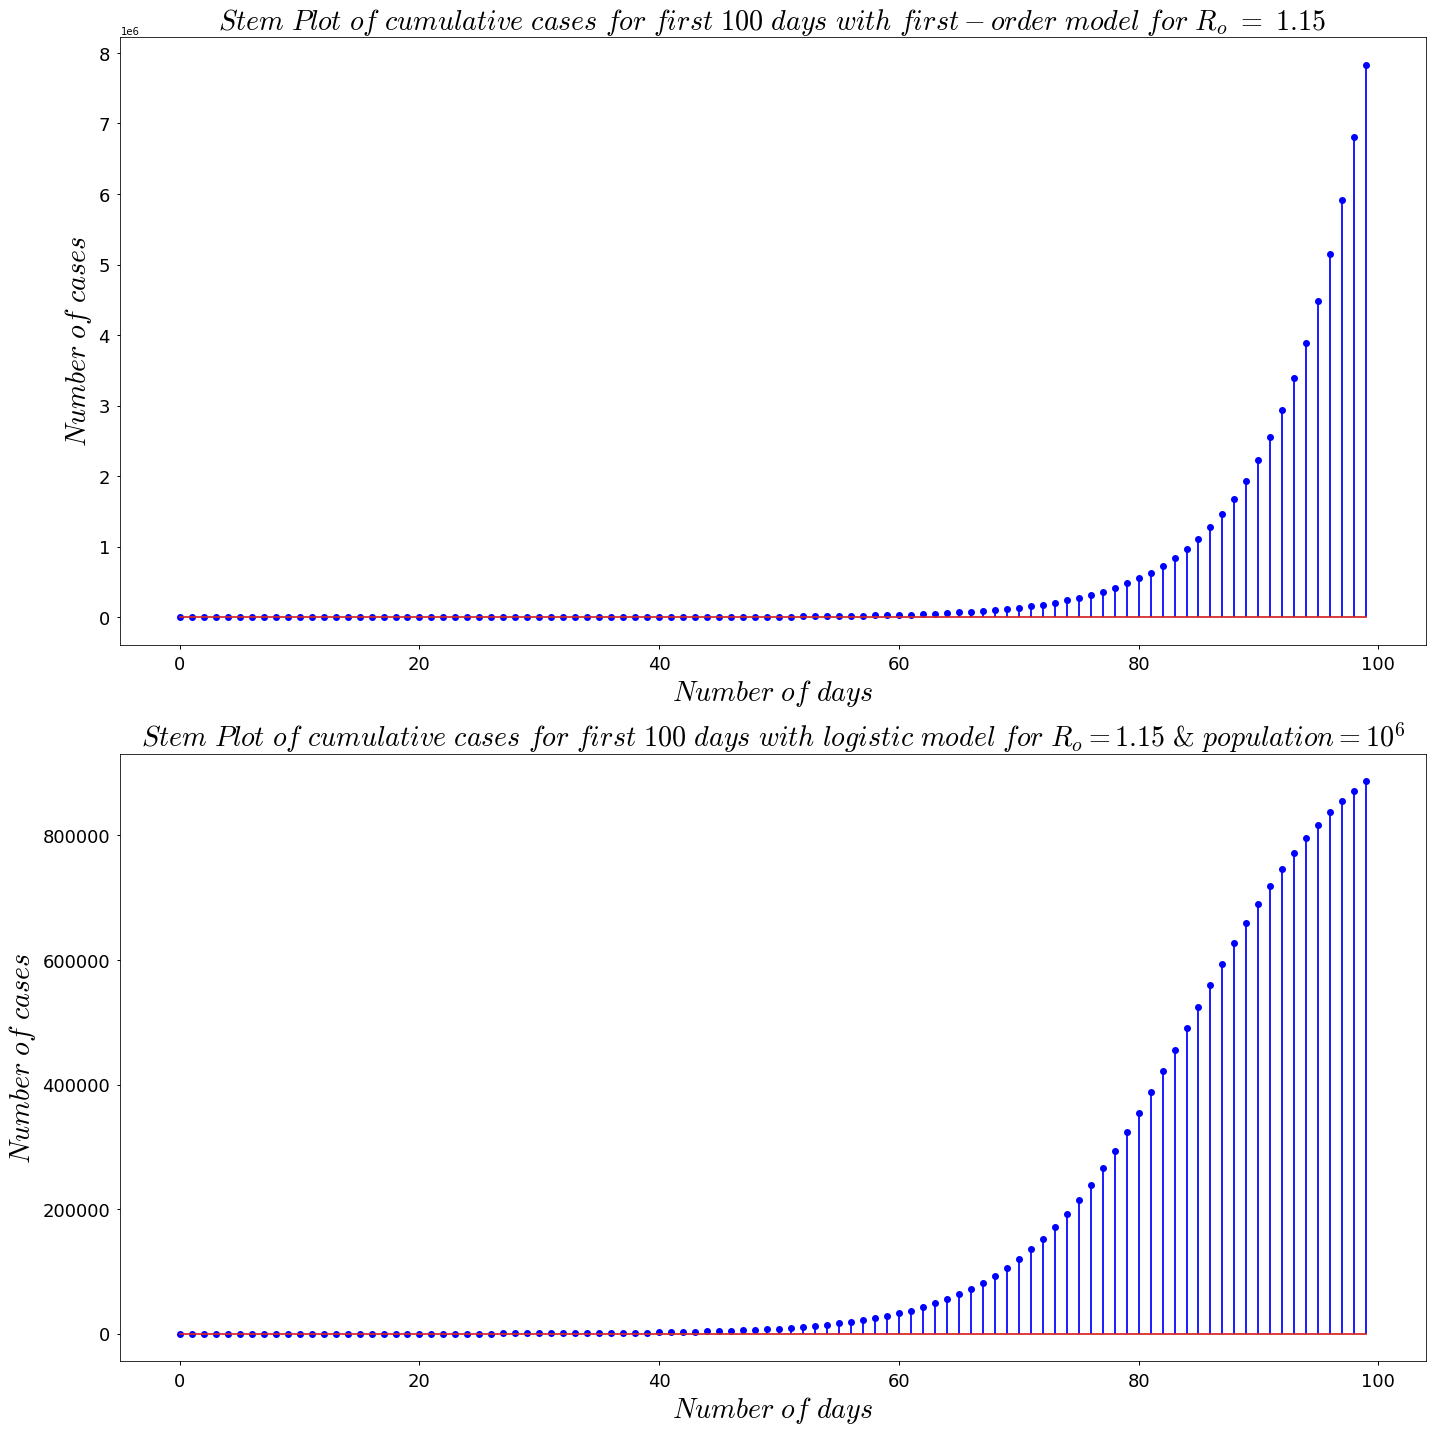

In [ ]:
k=1e6
ro=1.15
def plot_s5(x, y, label=None, title=None, xaxis_label=None, yaxis_label=None,  color=None):
 col='b'
 if color:
    col=color
 markerline, stemline, baseline= plt.stem(x, y, use_line_collection=True, label=label)
 plt.setp(stemline, color=col)
 plt.setp(markerline, color=col)
 plt.xlabel(xaxis_label, fontsize = 28)
 plt.ylabel(yaxis_label, fontsize = 28)
 plt.title(title, fontsize = 28)
 plt.xticks(fontsize=18)
 plt.yticks(fontsize=18) 
 plt.tight_layout()
n=np.arange(100)
s=(-1/(ro-1))+k/(1 + (ro**-(n+1))*(k*(ro-1)-ro))
b_fo=np.array([1, 0])
a_fo=np.array([1, -ro])
print('The first order Transfer function for Ro = {} is given by {}'.format(ro, control.TransferFunction(b_fo, a_fo, dt=True)))
x=np.zeros(100)
x[0]=1
y4=sp.lfilter(b_fo, a_fo, x)
yc3=sp.lfilter(bi, ai, y4)
plt.rcParams['figure.figsize'] = [20,20]
plt.subplot(211)
plot_s5(n, yc3, title=r'$Stem\ Plot\ of\ cumulative\ cases\ for\ first\ 100\ days\ with\ first-order\ model\ for\ R_{o}\ =\ 1.15 $ ', xaxis_label=r'$Number\ of\ days$', yaxis_label=r'$Number\ of\ cases$')
plt.subplot(212)
plot_s5(n, s, title=r'$Stem\ Plot\ of\ cumulative\ cases\ for\ first\ 100\ days\ with\ logistic\ model\ for\ R_{o} = 1.15\ &\ population = 10^6$', xaxis_label=r'$Number\ of\ days$', yaxis_label=r'$Number\ of\ cases$')
plt.savefig('fig8.png')



Part 2:

In [ ]:
b_fd=np.array([1, -1])
a_fd=np.array([1, 0])
b_sd=np.array([1, -2, 1])
a_sd=np.array([1, 0, 0])
fd=sp.lfilter(b_fd, a_fd, s)
sd=sp.lfilter(b_sd, a_sd, s)
peaks=sp.find_peaks(fd, prominence=0.6)[0]
for i in range(len(sd)):
    if i==0:
        continue
    if i==len(sd)-1:
        break
    else:
        if (sd[i-1]>=0 and sd[i+1]<=0) or (sd[i-1]<=0 and sd[i+1]>=0):
            break
        else:
            continue
print('The Point of Inflection obtained using the global maximum of the first derivative: ', peaks[0])
print('\nThe Point of Inflection obtained using the zero-crossing of the second derivative: ', i)

The Point of Inflection obtained using the global maximum of the first derivative:  85

The Point of Inflection obtained using the zero-crossing of the second derivative:  85
